#### Aquí encontrarás todo lo que necesitas saber: https://www.kaggle.com/competitions/desafio-de-prediccion-de-precios-de-portatiles

## Librerias

In [583]:
import bootcampviztools as bt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import Toolbox_ML as tb

from collections import Counter
from lightgbm import LGBMClassifier
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif, SelectFromModel, RFE, SequentialFeatureSelector
from sklearn.metrics import mutual_info_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings("ignore")

## Data

In [584]:
### Para que funcione necesitas bajarte los archivos de datos de Kaggle 
df = pd.read_csv("./data/train.csv")

## Data exploration

In [585]:
df.head()

,id,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,268,1002,Dell,Inspiron 5567,Notebook,15.6,1366x768,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,AMD Radeon R7 M445,Windows 10,2.36kg,749.00
1,347,867,Asus,X541NA (N4200/4GB/1TB/W10),Notebook,15.6,1366x768,Intel Pentium Quad Core N4200 1.1GHz,4GB,1TB HDD,Intel HD Graphics 505,Windows 10,2kg,449.00
2,353,966,Toshiba,Portege Z30-C-1CW,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 7,1.2kg,1460.00
3,578,767,Dell,Alienware 17,Gaming,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.42kg,2868.99
4,42,1241,Dell,Latitude E7270,Ultrabook,12.5,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 7,1.26kg,1713.37


In [586]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                912 non-null    int64  
 1   laptop_ID         912 non-null    int64  
 2   Company           912 non-null    object 
 3   Product           912 non-null    object 
 4   TypeName          912 non-null    object 
 5   Inches            912 non-null    float64
 6   ScreenResolution  912 non-null    object 
 7   Cpu               912 non-null    object 
 8   Ram               912 non-null    object 
 9   Memory            912 non-null    object 
 10  Gpu               912 non-null    object 
 11  OpSys             912 non-null    object 
 12  Weight            912 non-null    object 
 13  Price_euros       912 non-null    float64
dtypes: float64(2), int64(2), object(10)
memory usage: 99.9+ KB


In [587]:
df.describe()

,id,laptop_ID,Inches,Price_euros
count,912.000000,912.000000,912.000000,912.000000
mean,645.091009,666.192982,15.011404,1108.122873
std,380.313813,384.873846,1.411744,714.597741
min,0.000000,1.000000,10.100000,174.000000
25%,319.750000,330.500000,14.000000,589.000000
50%,636.500000,673.500000,15.600000,949.000000
75%,980.250000,998.500000,15.600000,1458.500000
max,1302.000000,1320.000000,18.400000,6099.000000


In [588]:
tb.describe_df(df)

,id,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
Tipos,int64,int64,object,object,object,float64,object,object,object,object,object,object,object,float64
% Faltante,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Valores Únicos,912,912,19,475,6,15,35,104,8,36,91,9,158,614
% Cardinalidad,100.0,100.0,2.08,52.08,0.66,1.64,3.84,11.4,0.88,3.95,9.98,0.99,17.32,67.32


In [589]:
tb.tipifica_variables(df, 8, 15)

,nombre_variable,tipo_sugerido
0,id,Numérica Continua
1,laptop_ID,Numérica Continua
2,Company,Numérica Discreta
3,Product,Numérica Continua
4,TypeName,Categórica
5,Inches,Numérica Discreta
6,ScreenResolution,Numérica Discreta
7,Cpu,Numérica Discreta
8,Ram,Numérica Discreta
9,Memory,Numérica Discreta


In [590]:
df.Company.value_counts()

Company
Lenovo       208
Dell         207
HP           189
Asus         108
Acer          75
Toshiba       37
MSI           34
Apple         17
Mediacom       7
Razer          6
Samsung        6
Fujitsu        3
Microsoft      3
Vero           3
Xiaomi         3
Google         2
Chuwi          2
LG             1
Huawei         1
Name: count, dtype: int64

In [591]:
df.Memory.value_counts()

Memory
256GB SSD                        293
1TB HDD                          150
500GB HDD                        100
512GB SSD                         75
128GB SSD +  1TB HDD              61
128GB SSD                         56
256GB SSD +  1TB HDD              52
32GB Flash Storage                27
64GB Flash Storage                11
2TB HDD                           11
512GB SSD +  1TB HDD              10
1TB SSD                            9
1.0TB Hybrid                       7
256GB Flash Storage                7
32GB SSD                           5
180GB SSD                          5
256GB SSD +  2TB HDD               4
16GB Flash Storage                 4
16GB SSD                           3
256GB SSD +  500GB HDD             2
1TB SSD +  1TB HDD                 2
128GB Flash Storage                2
512GB SSD +  2TB HDD               2
512GB Flash Storage                2
1.0TB HDD                          1
32GB HDD                           1
128GB SSD +  2TB HDD           

In [592]:
df.Ram.value_counts()

Ram
8GB     434
4GB     274
16GB    125
6GB      32
2GB      16
12GB     15
32GB     14
24GB      2
Name: count, dtype: int64

In [593]:
df.Cpu.value_counts()

Cpu
Intel Core i5 7200U 2.5GHz     142
Intel Core i7 7700HQ 2.8GHz    102
Intel Core i7 7500U 2.7GHz      88
Intel Core i5 8250U 1.6GHz      54
Intel Core i5 6200U 2.3GHz      51
                              ... 
Intel Core i7 7660U 2.5GHz       1
AMD E-Series E2-9000 2.2GHz      1
Intel Core i3 6006U 2.2GHz       1
Intel Core i7 2.8GHz             1
AMD E-Series 9000 2.2GHz         1
Name: count, Length: 104, dtype: int64

In [594]:
df.TypeName.value_counts()

TypeName
Notebook              522
Gaming                138
Ultrabook             135
2 in 1 Convertible     85
Workstation            18
Netbook                14
Name: count, dtype: int64

In [613]:
df.ScreenResolution.value_counts()

ScreenResolution
Full HD 1920x1080                                346
1366x768                                         208
IPS Panel Full HD 1920x1080                      163
IPS Panel Full HD / Touchscreen 1920x1080         37
Full HD / Touchscreen 1920x1080                   32
Touchscreen 1366x768                              15
1600x900                                          11
IPS Panel 4K Ultra HD 3840x2160                   10
4K Ultra HD / Touchscreen 3840x2160                8
Quad HD+ / Touchscreen 3200x1800                   8
IPS Panel 4K Ultra HD / Touchscreen 3840x2160      8
IPS Panel Retina Display 2304x1440                 6
IPS Panel Retina Display 2560x1600                 5
IPS Panel 1366x768                                 5
4K Ultra HD 3840x2160                              5
IPS Panel Touchscreen 1920x1200                    4
Touchscreen 2560x1440                              4
IPS Panel Quad HD+ / Touchscreen 3200x1800         4
IPS Panel Touchscreen 2560x14

## Separar las ????x????

In [596]:
df.Inches.value_counts()

Inches
15.6    474
14.0    143
13.3    111
17.3    108
12.5     28
11.6     21
12.0      6
10.1      4
13.9      4
15.4      3
15.0      3
13.5      3
12.3      2
13.0      1
18.4      1
Name: count, dtype: int64

In [597]:
df.Product.value_counts()

Product
Inspiron 3567                                21
XPS 13                                       20
250 G6                                       19
Vostro 3568                                  16
Inspiron 5570                                11
                                             ..
Elitebook Folio                               1
Q304UA-BHI5T11 (i5-7200U/6GB/1TB/FHD/W10)     1
ThinkPad T470p                                1
V310-15IKB (i5-7200U/4GB/1TB/No               1
Portege Z30-C-16H                             1
Name: count, Length: 475, dtype: int64

In [598]:
df.OpSys.value_counts()

OpSys
Windows 10      746
Linux            47
No OS            44
Windows 7        32
Chrome OS        20
macOS            11
Mac OS X          6
Windows 10 S      4
Android           2
Name: count, dtype: int64

## Data processing

-----------------------------------------------------------------------------------------------------------------

## Pasos que si o si debéis realizar para poder participar en la competición:

### 1. Definir X e y

In [599]:
target = "Price_euros"


In [600]:
X = df.drop(target, axis = 1)
y = df[target]

### 2. Dividir X_train, X_test, y_train, y_test

- Tengo que eliminar los valores en los que solo haya 1 unidad, porque si no al hacer el train test, habrá diferencias

In [601]:
df.Company.value_counts().index

Index(['Lenovo', 'Dell', 'HP', 'Asus', 'Acer', 'Toshiba', 'MSI', 'Apple',
       'Mediacom', 'Razer', 'Samsung', 'Fujitsu', 'Microsoft', 'Vero',
       'Xiaomi', 'Google', 'Chuwi', 'LG', 'Huawei'],
      dtype='object', name='Company')

In [606]:
columnas_a_transformar = ['Company', 'Product', 'TypeName','ScreenResolution', 'Cpu', 'Memory', 'Gpu', 'OpSys']

In [602]:
valores

['LG', 'Huawei']

In [609]:
for col in columnas_a_transformar:
    # Obtener los valores a eliminar
    value_counts = df[col].value_counts()
    valores_a_eliminar = value_counts[value_counts < 2].index
    
    # Filtrar el DataFrame
    df_2 = df_2[~df_2[col].isin(valores_a_eliminar)]

In [611]:
df_2.Company.value_counts()

Company
Dell        74
Lenovo      68
HP          52
Acer        21
Asus        14
Samsung      4
Toshiba      3
Mediacom     2
Apple        2
Razer        1
MSI          1
Google       1
Xiaomi       1
Name: count, dtype: int64

In [608]:
for col in columnas_a_transformar:
    valores = []
    for i in range(len(df[col].value_counts())):
        if df[col].value_counts()[i] < 2:
            valores.append(df[col].value_counts().index[i])
            valores_mantenidos = [valor for valor in df[col].value_counts().index if valor not in valores]
            print(valores_mantenidos)
            df_2[col] = df[df[col].isin(valores_mantenidos)].copy() 

['Lenovo', 'Dell', 'HP', 'Asus', 'Acer', 'Toshiba', 'MSI', 'Apple', 'Mediacom', 'Razer', 'Samsung', 'Fujitsu', 'Microsoft', 'Vero', 'Xiaomi', 'Google', 'Chuwi', 'Huawei']


ValueError: Columns must be same length as key

In [333]:
df_filtered.Company.value_counts()

Company
Lenovo       110
HP            94
Dell          82
Asus          57
Acer          39
MSI           16
Toshiba       12
Mediacom       5
Samsung        5
Fujitsu        3
Apple          3
Razer          3
Google         2
LG             1
Huawei         1
Microsoft      1
Xiaomi         1
Name: count, dtype: int64

In [318]:
train_set, test_set = train_test_split(df, test_size = 0.2, random_state= 42)

In [320]:
type(train_set.Company)

pandas.core.series.Series

#### Mini-eda

- Analizo la distribución del target:

<Axes: xlabel='Price_euros', ylabel='Count'>

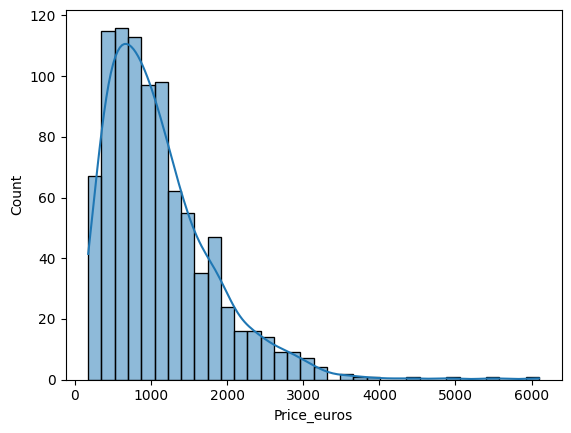

In [276]:
sns.histplot(df[target], kde = True)

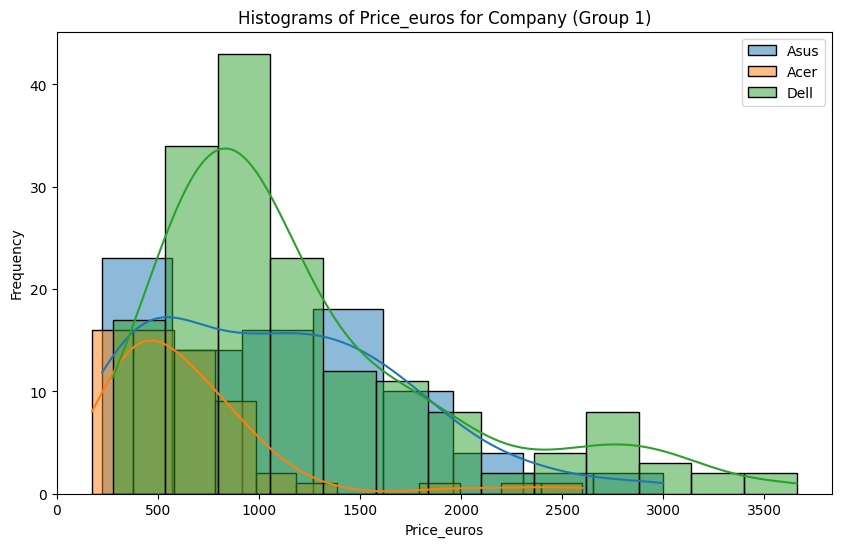

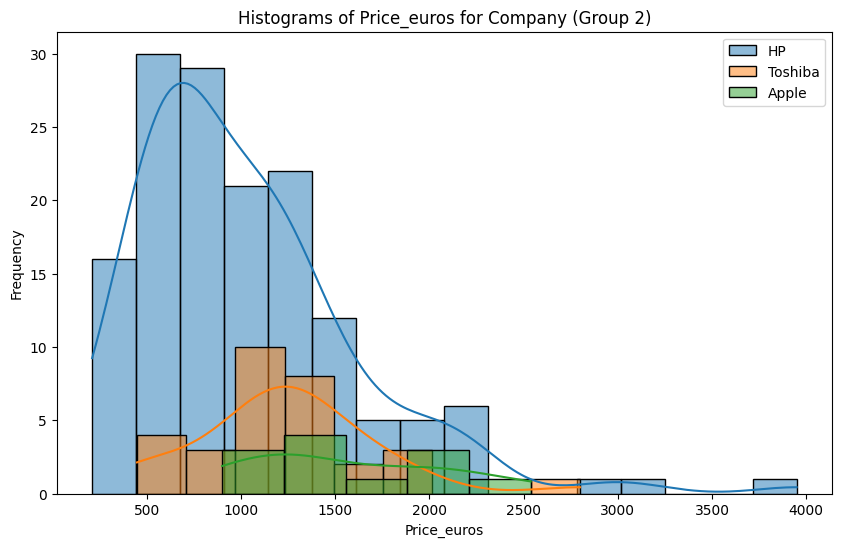

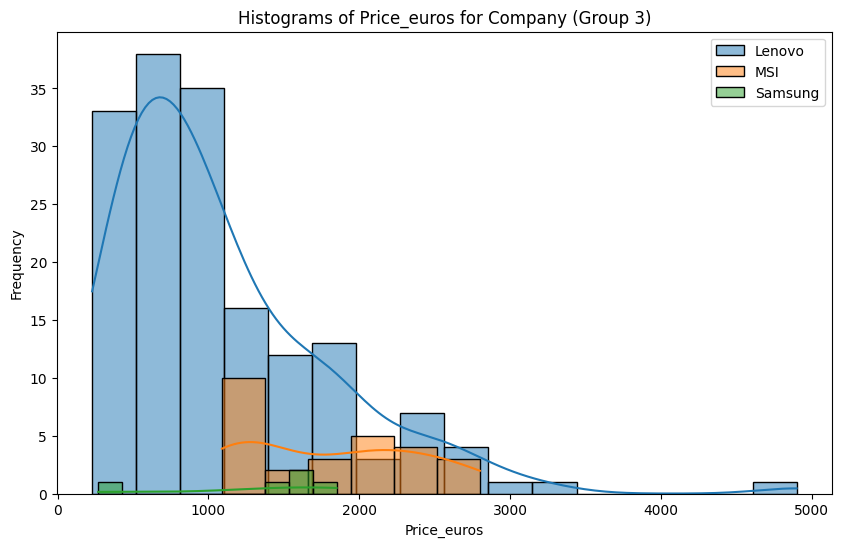

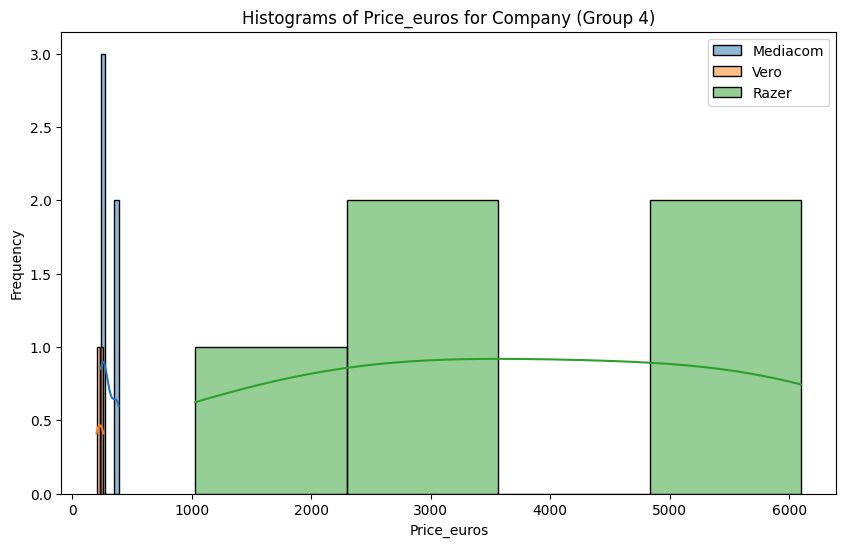

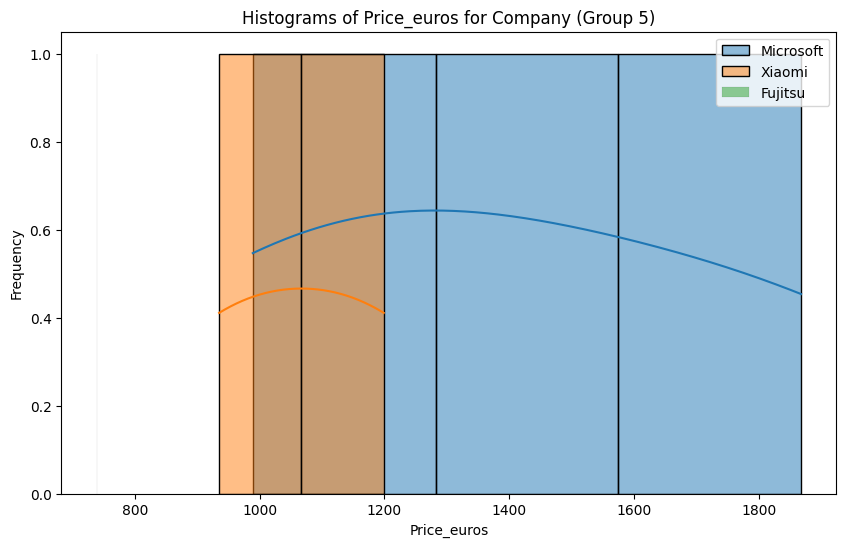

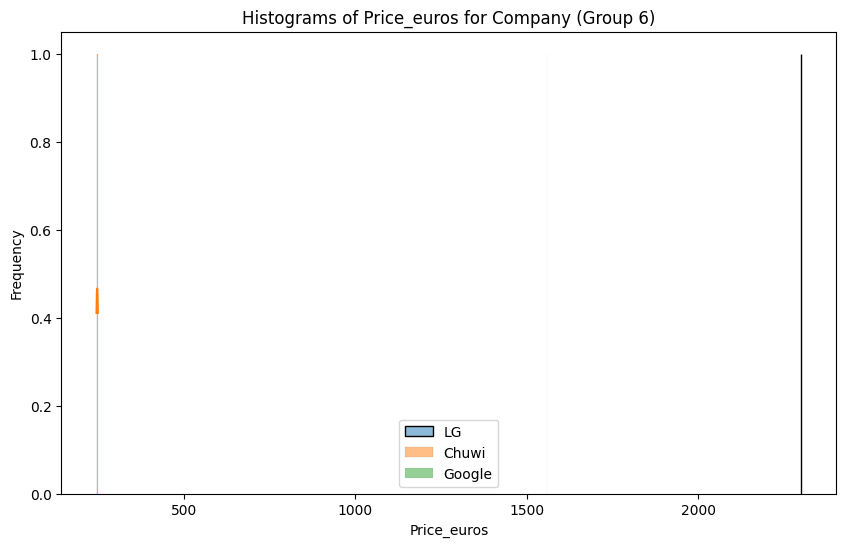

In [277]:
bt.plot_grouped_histograms(train_set, cat_col= "Company", num_col= target, group_size= 3)

In [279]:
train_set[features_cat].head()

,Company,Product,TypeName,ScreenResolution,Cpu,Memory,Gpu,OpSys
25,Asus,X540UA-DM186 (i3-6006U/4GB/1TB/FHD/Linux),Notebook,Full HD 1920x1080,Intel Core i3 6006U 2GHz,1TB HDD,Intel HD Graphics 620,Linux
84,Acer,Aspire 3,Notebook,1366x768,AMD A9-Series 9420 3GHz,256GB SSD,AMD Radeon R5,Windows 10
10,Asus,X540SA-RBPDN09 (N3710/4GB/1TB/W10),Notebook,1366x768,Intel Pentium Quad Core N3710 1.6GHz,1TB HDD,Intel HD Graphics 405,Windows 10
342,Dell,Inspiron 3576,Notebook,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,1TB HDD,AMD Radeon 520,Linux
890,HP,14-am079na (N3710/8GB/2TB/W10),Notebook,1366x768,Intel Pentium Quad Core N3710 1.6GHz,2TB HDD,Intel HD Graphics 405,Windows 10


In [280]:
train_set = pd.get_dummies(train_set, columns = columnas_a_transformar, dtype = int)
test_set = pd.get_dummies(test_set, columns = columnas_a_transformar, dtype = int)

In [298]:
train_set

,id,laptop_ID,Inches,Ram,Weight,Price_euros,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,...,Gpu_Nvidia Quadro M620M,OpSys_Android,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS
25,829,41,0.378771,-0.849979,-0.091421,389.0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
84,788,127,0.378771,-0.849979,0.058967,451.0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
10,851,1243,0.378771,-0.849979,0.886100,309.0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
342,126,105,0.378771,-0.070564,0.209355,647.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
890,223,578,-0.783550,-0.070564,-0.181654,389.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,555,267,0.378771,-0.849979,0.058967,722.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
270,308,610,1.613737,1.488265,3.126877,2199.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
860,281,1026,-0.783550,-0.849979,-0.873437,1590.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
435,729,363,0.378771,-0.070564,0.886100,999.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [297]:
test_set

,id,laptop_ID,Inches,Ram,Weight,Price_euros,Company_Acer,Company_Apple,Company_Asus,Company_Dell,...,Gpu_Nvidia Quadro 3000M,Gpu_Nvidia Quadro M2000M,Gpu_Nvidia Quadro M520M,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 7,OpSys_macOS
649,174,722,0.378771,1.488265,-0.196692,1426.66,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
761,691,1022,-0.783550,-0.070564,-0.632817,1049.26,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
545,176,630,0.378771,-0.070564,0.209355,799.00,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
367,972,714,-1.292066,-0.070564,-0.692972,999.00,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
361,554,624,0.378771,-0.070564,-0.332041,1389.00,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,1230,312,0.378771,-0.070564,0.209355,1043.00,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
581,232,671,0.378771,-0.460272,-0.031266,539.00,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
872,116,955,1.613737,-0.849979,1.111681,530.00,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
449,626,672,1.613737,-0.070564,0.961293,1486.77,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [281]:
train_set.columns[6:]

Index(['Company_Acer', 'Company_Apple', 'Company_Asus', 'Company_Chuwi',
       'Company_Dell', 'Company_Fujitsu', 'Company_Google', 'Company_HP',
       'Company_LG', 'Company_Lenovo',
       ...
       'Gpu_Nvidia Quadro M620M', 'OpSys_Android', 'OpSys_Chrome OS',
       'OpSys_Linux', 'OpSys_Mac OS X', 'OpSys_No OS', 'OpSys_Windows 10',
       'OpSys_Windows 10 S', 'OpSys_Windows 7', 'OpSys_macOS'],
      dtype='object', length=680)

In [282]:
features_cat_encoded = train_set.columns[6:].copy()

In [283]:
train_set.head()

,id,laptop_ID,Inches,Ram,Weight,Price_euros,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,...,Gpu_Nvidia Quadro M620M,OpSys_Android,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS
25,829,41,15.6,4GB,2kg,389.0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
84,788,127,15.6,4GB,2.1kg,451.0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
10,851,1243,15.6,4GB,2.65kg,309.0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
342,126,105,15.6,8GB,2.2kg,647.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
890,223,578,14.0,8GB,1.94kg,389.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [284]:
train_set.Weight = train_set.Weight.str.replace('kg','',regex=False)
train_set.Weight = train_set.Weight.astype(float)

test_set.Weight = test_set.Weight.str.replace('kg','',regex=False)
test_set.Weight = test_set.Weight.astype(float)

train_set.Ram = train_set.Ram.str.replace('GB','',regex=False)
train_set.Ram = train_set.Ram.astype(float)

test_set.Ram = test_set.Ram.str.replace('GB','',regex=False)
test_set.Ram = test_set.Ram.astype(float)

In [285]:
features_num = ['Weight','Inches','Ram']

array([[<Axes: title={'center': 'Weight'}>,
        <Axes: title={'center': 'Inches'}>],
       [<Axes: title={'center': 'Ram'}>, <Axes: >]], dtype=object)

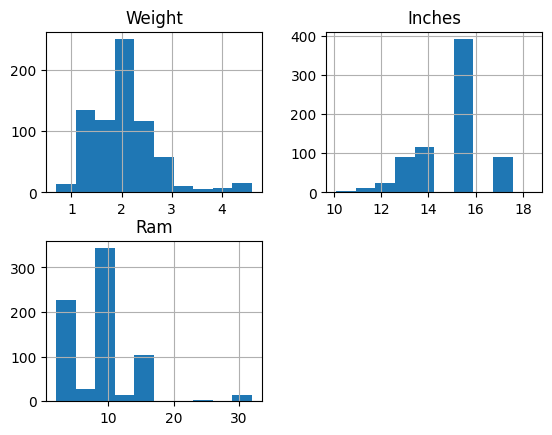

In [286]:
train_set[features_num].hist()

In [287]:
train_set.head()

,id,laptop_ID,Inches,Ram,Weight,Price_euros,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,...,Gpu_Nvidia Quadro M620M,OpSys_Android,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS
25,829,41,15.6,4.0,2.00,389.0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
84,788,127,15.6,4.0,2.10,451.0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
10,851,1243,15.6,4.0,2.65,309.0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
342,126,105,15.6,8.0,2.20,647.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
890,223,578,14.0,8.0,1.94,389.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [288]:
train_set[features_num]

,Weight,Inches,Ram
25,2.00,15.6,4.0
84,2.10,15.6,4.0
10,2.65,15.6,4.0
342,2.20,15.6,8.0
890,1.94,14.0,8.0
...,...,...,...
106,2.10,15.6,4.0
270,4.14,17.3,16.0
860,1.48,14.0,4.0
435,2.65,15.6,8.0


In [289]:
scaler = StandardScaler()
train_set[features_num] = scaler.fit_transform(train_set[features_num])
test_set[features_num] = scaler.transform(test_set[features_num])

In [290]:
train_set[features_cat_encoded]

,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_LG,Company_Lenovo,...,Gpu_Nvidia Quadro M620M,OpSys_Android,OpSys_Chrome OS,OpSys_Linux,OpSys_Mac OS X,OpSys_No OS,OpSys_Windows 10,OpSys_Windows 10 S,OpSys_Windows 7,OpSys_macOS
25,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
84,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
10,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
342,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
890,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
270,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
860,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
435,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [291]:
features_cat_encoded = train_set[features_cat_encoded].columns.to_list()
features_cat_encoded

['Company_Acer',
 'Company_Apple',
 'Company_Asus',
 'Company_Chuwi',
 'Company_Dell',
 'Company_Fujitsu',
 'Company_Google',
 'Company_HP',
 'Company_LG',
 'Company_Lenovo',
 'Company_MSI',
 'Company_Mediacom',
 'Company_Microsoft',
 'Company_Razer',
 'Company_Samsung',
 'Company_Toshiba',
 'Company_Vero',
 'Company_Xiaomi',
 'Product_14-am079na (N3710/8GB/2TB/W10)',
 'Product_15-AC110nv (i7-6500U/6GB/1TB/Radeon',
 'Product_15-AY023na (N3710/8GB/2TB/W10)',
 'Product_15-BS026nv (i5-7200U/8GB/256GB/Radeon',
 'Product_15-BS101nv (i7-8550U/8GB/256GB/FHD/W10)',
 'Product_15-BS103nv (i5-8250U/6GB/256GB/Radeon',
 'Product_15-ba043na (A12-9700P/8GB/2TB/W10)',
 'Product_15-bs015dx (i5-7200U/8GB/1TB/W10)',
 'Product_15-bs025nv (i5-7200U/8GB/256GB/W10)',
 'Product_15-bs053od (i7-7500U/6GB/1TB/W10)',
 'Product_15-bs078cl (i7-7500U/8GB/2TB/W10)',
 'Product_15-bs190od (i5-8250U/4GB/1TB/W10)',
 'Product_15-bw002nv (A6-9220/4GB/256GB/Radeon',
 'Product_15-bw003nv (A9-Series-9420/4GB/256GB/FHD/W10)',


In [255]:
X_train = train_set[features_cat_encoded + features_num].copy()
y_train = train_set[target]
X_test = test_set[features_cat_encoded + features_num].copy()
y_test = test_set[target]

KeyError: '[\'Company_Chuwi\', \'Company_LG\', \'Company_Microsoft\', \'Product_14-am079na (N3710/8GB/2TB/W10)\', \'Product_15-AY023na (N3710/8GB/2TB/W10)\', \'Product_15-BS026nv (i5-7200U/8GB/256GB/Radeon\', \'Product_15-BS101nv (i7-8550U/8GB/256GB/FHD/W10)\', \'Product_15-BS103nv (i5-8250U/6GB/256GB/Radeon\', \'Product_15-ba043na (A12-9700P/8GB/2TB/W10)\', \'Product_15-bs015dx (i5-7200U/8GB/1TB/W10)\', \'Product_15-bs025nv (i5-7200U/8GB/256GB/W10)\', \'Product_15-bs053od (i7-7500U/6GB/1TB/W10)\', \'Product_15-bs078cl (i7-7500U/8GB/2TB/W10)\', \'Product_15-bs190od (i5-8250U/4GB/1TB/W10)\', \'Product_15-bw002nv (A6-9220/4GB/256GB/Radeon\', \'Product_15-bw003nv (A9-Series-9420/4GB/256GB/FHD/W10)\', \'Product_15-bw007nv (A10-9620P/6GB/128GB/Radeon\', \'Product_15-bw009nv (A12-9720P/6GB/1TB/Radeon\', \'Product_15-bw011nv (A6-9220/4GB/1TB/FHD/W10)\', \'Product_15-cb003na (i5-7300HQ/8GB/1TB\', \'Product_15-cd005nv (A9-9420/6GB/256GB/Radeon\', \'Product_15-ra044nv (N3060/4GB/500GB/W10)\', \'Product_17-BS092ND (i3-6006U/8GB/256GB/W10)\', \'Product_17-X047na (i3-6006U/8GB/1TB/W10)\', \'Product_17-ak001nv (A6-9220/4GB/500GB/Radeon\', \'Product_17-ak002nv (A10-9620P/6GB/2TB/Radeon\', \'Product_17-bs000nv I3\', \'Product_17-bs001nv (i5-7200U/6GB/2TB/Radeon\', \'Product_250 G4\', \'Product_250 G5\', \'Product_255 G6\', \'Product_A541NA-GO342 (N3350/4GB/500GB/Linux)\', \'Product_Alienware 15\', \'Product_Alienware 17\', \'Product_Aspire 1\', \'Product_Aspire 5\', \'Product_Aspire 7\', \'Product_Aspire A315-31\', \'Product_Aspire A515-51G\', \'Product_Aspire A715-71G\', \'Product_Aspire E5-475\', \'Product_Aspire E5-575\', \'Product_Aspire E5-576G\', \'Product_Aspire E5-774G\', \'Product_Aspire ES1-523\', \'Product_Aspire ES1-533\', \'Product_Aspire ES1-572\', \'Product_B51-80 (i7-6500U/4GB/1008GB/FHD/W7)\', \'Product_B51-80 (i7-6500U/8GB/1008GB/Radeon\', \'Product_Blade Pro\', \'Product_C740-C9QX (3205U/2GB/32GB/Chrome\', \'Product_Chromebook 13\', \'Product_Chromebook 14\', \'Product_Chromebook 15\', \'Product_Chromebook 3\', \'Product_Chromebook C731-C78G\', \'Product_Chromebook CB5-571-C1DZ\', \'Product_Chromebook Flip\', \'Product_Chromebook N23\', \'Product_E402WA-GA007T (E2-6110/4GB/64GB/W10\', \'Product_EliteBook x360\', \'Product_Elitebook 840\', \'Product_Elitebook 850\', \'Product_Elitebook Folio\', \'Product_Envy 13-AB002nv\', \'Product_Envy 13-AB077cl\', \'Product_Envy 13-AD007nv\', \'Product_Extensa EX2540-58KR\', \'Product_FX502VM-DM105T (i7-6700HQ/8GB/1TB/GeForce\', \'Product_FX503VM-E4007T (i7-7700HQ/16GB/1TB\', \'Product_FX550IK-DM018T (FX-9830P/8GB/1TB/Radeon\', \'Product_FX553VD-DM627T (i5-7300HQ/8GB/1TB\', \'Product_FX553VD-FY647T (i7-7700HQ/8GB/256GB/GeForce\', \'Product_FX753VD-GC071T (i7-7700HQ/8GB/1TB/GeForce\', \'Product_FX753VD-GC086T (i5-7300HQ/8GB/1TB\', \'Product_FX753VE-GC093 (i7-7700HQ/12GB/1TB/GeForce\', \'Product_FX753VE-GC155T (i7-7700HQ/16GB/1TB\', \'Product_Flex 5\', \'Product_G752VY-GC162T (i7-6700HQ/16GB/1TB\', \'Product_GE63VR 7RE\', \'Product_GE63VR 7RF\', \'Product_GE72MVR 7RG\', \'Product_GL62 6QF\', \'Product_GL62M (i5-7300HQ/8GB/1TB\', \'Product_GL62M 7RD\', \'Product_GL62M 7RDX\', \'Product_GL72M 7REX\', \'Product_GP62 7RDX\', \'Product_GP62M 7RDX\', \'Product_GP62M 7REX\', \'Product_GP72M 7REX\', \'Product_GP72MVR 7RFX\', \'Product_GS43VR 7RE\', \'Product_GS60 Ghost\', \'Product_GS63VR 7RF\', \'Product_GS73VR 7RG\', \'Product_GS73VR Stealth\', \'Product_GT62VR 6RD\', \'Product_GT62VR 7RE\', \'Product_GT72VR Dominator\', \'Product_GT73EVR 7RE\', \'Product_GT73VR Titan\', \'Product_GT80S 6QF-074US\', \'Product_Gram 15Z975\', \'Product_IdeaPad 100S-14IBR\', \'Product_IdeaPad 300-17ISK\', \'Product_IdeaPad 320-15ABR\', \'Product_IdeaPad 320-15IKB\', \'Product_IdeaPad 320-15IKBN\', \'Product_IdeaPad 320-17IKB\', \'Product_IdeaPad 320-17IKBR\', \'Product_IdeaPad 500-15ISK\', \'Product_IdeaPad 510-15IKB\', \'Product_IdeaPad 510s-14IKB\', \'Product_IdeaPad 520s-14IKB\', \'Product_IdeaPad Y700-15ACZ\', \'Product_IdeaPad Y700-15ISK\', \'Product_IdeaPad Y900-17ISK\', \'Product_IdeaPad Y910-17ISK\', \'Product_Ideapad 320-15IKBN\', \'Product_Ideapad 320-15IKBR\', \'Product_Ideapad 510S-13IKB\', \'Product_Inspiron 3179\', \'Product_Inspiron 5368\', \'Product_Inspiron 5370\', \'Product_Inspiron 5568\', \'Product_Inspiron 5577\', \'Product_Inspiron 5579\', \'Product_Inspiron 5767\', \'Product_Inspiron 5770\', \'Product_Inspiron 7378\', \'Product_Inspiron 7570\', \'Product_Inspiron 7579\', \'Product_Inspiron 7773\', \'Product_K146 (N3350/4GB/32GB/W10)\', \'Product_K147 (N3350/4GB/32GB/FHD/W10)\', \'Product_K756UX-T4340T (i5-7200U/8GB/500GB\', \'Product_L403NA-GA013TS (N3350/4GB/32GB/W10)\', \'Product_LapBook 15.6"\', \'Product_Lapbook 15,6\', \'Product_Laptop MSI\', \'Product_Latitude 3380\', \'Product_Latitude 3480\', \'Product_Latitude 3570\', \'Product_Latitude 5289\', \'Product_Latitude 5590\', \'Product_Latitude E5470\', \'Product_Latitude E7270\', \'Product_Legion Y720-15IKB\', \'Product_Leopard GP72M\', \'Product_Lifebook A557\', \'Product_MacBook Air\', \'Product_Macbook Air\', \'Product_N42-20 Chromebook\', \'Product_Nitro 5\', \'Product_Noteb Pav\', \'Product_Omen 15-AX205na\', \'Product_Omen 15-ce006nv\', \'Product_Omen 17-W006na\', \'Product_Omen 17-w207nv\', \'Product_Pavilion 15-AW003nv\', \'Product_Pavilion 15-BC000nv\', \'Product_Pavilion 15-CK000nv\', \'Product_Pavilion 15-cb003nv\', \'Product_Pavilion Power\', \'Product_Portege A30-C-1CZ\', \'Product_Portege X20W-D-10V\', \'Product_Portege X30-D-10L\', \'Product_Portege X30-D-10V\', \'Product_Portege X30-D-10X\', \'Product_Portege Z30-C-16H\', \'Product_Portege Z30-C-16J\', \'Product_Portege Z30-C-16L\', \'Product_Portege Z30-C-1CV\', \'Product_Portege Z30-C-1CW\', \'Product_Portégé Z30-C-16K\', \'Product_Portégé Z30-C-188\', \'Product_Precision 3520\', \'Product_Precision 5520\', \'Product_Precision 7520\', \'Product_Precision M5520\', \'Product_Predator 17\', \'Product_Predator G9-793\', \'Product_Pro P2540UA-AB51\', \'Product_Pro P2540UA-XO0192R\', \'Product_Pro P2540UA-XS51\', \'Product_ProBook 430\', \'Product_ProBook 640\', \'Product_ProBook 650\', \'Product_ProBook x360\', \'Product_Probook 430\', \'Product_Probook 440\', \'Product_Probook 450\', \'Product_Probook 470\', \'Product_Probook 640\', \'Product_Probook 650\', \'Product_Q304UA-BHI5T11 (i5-7200U/6GB/1TB/FHD/W10)\', \'Product_R417NA-RS01 (N3350/4GB/32GB/W10)\', \'Product_ROG G701VI\', \'Product_ROG GL703VD-GC028T\', \'Product_ROG Strix\', \'Product_Rog G701VIK-BA060T\', \'Product_Rog G752VL-GC088D\', \'Product_Rog G752VL-UH71T\', \'Product_Rog GL502VM-DS74\', \'Product_Rog GL502VS\', \'Product_Rog GL552VW-CN470T\', \'Product_Rog GL553VE-DS74\', \'Product_Rog GL553VE-FY052T\', \'Product_Rog GL702VM-GC017T\', \'Product_Rog GL702VM-GC354T\', \'Product_Rog GL702VS-GC095T\', \'Product_Rog GL753VD-GC082T\', \'Product_Rog GL753VE-DS74\', \'Product_Rog Strix\', \'Product_SP714-51 (i7-7Y75/8GB/256GB/FHD/W10)\', \'Product_SmartBook 130\', \'Product_SmartBook 140\', \'Product_SmartBook Edge\', \'Product_Smartbook 142\', \'Product_Spectre 13-V100nv\', \'Product_Spectre x360\', \'Product_Stream 14-AX000nv\', \'Product_Surface Laptop\', \'Product_Swift 7\', \'Product_Swift SF114-31-P5HY\', \'Product_TMX349-G2-M-50FS (i5-7200U/8GB/256GB/FHD/W10)\', \'Product_Tecra A40-C-1DF\', \'Product_Tecra A40-C-1KF\', \'Product_Tecra A50-C-1ZV\', \'Product_Tecra A50-C-21G\', \'Product_Tecra A50-D-11D\', \'Product_Tecra A50-D-11M\', \'Product_Tecra Z40-C-12X\', \'Product_Tecra Z40-C-136\', \'Product_Tecra Z40-C-161\', \'Product_Tecra Z50-C-140\', \'Product_Tecra Z50-C-144\', \'Product_Tecra Z50-D-10E\', \'Product_ThinkPad E470\', \'Product_ThinkPad E580\', \'Product_ThinkPad L470\', \'Product_ThinkPad L570\', \'Product_ThinkPad P40\', \'Product_ThinkPad P51\', \'Product_ThinkPad T460s\', \'Product_ThinkPad T470\', \'Product_ThinkPad T470p\', \'Product_ThinkPad T470s\', \'Product_ThinkPad T560\', \'Product_ThinkPad T570\', \'Product_ThinkPad X270\', \'Product_Thinkpad 13\', \'Product_Thinkpad E570\', \'Product_Thinkpad L560\', \'Product_Thinkpad P50\', \'Product_Thinkpad P51\', \'Product_Thinkpad P71\', \'Product_Thinkpad T460\', \'Product_Thinkpad T460p\', \'Product_Thinkpad T460s\', \'Product_Thinkpad T560\', \'Product_Thinkpad X260\', \'Product_Thinkpad X270\', \'Product_Thinkpad Yoga\', \'Product_TravelMate B117-M\', \'Product_TravelMate P238-M\', \'Product_TravelMate P259-G2\', \'Product_UX410UA-GV350T (i5-8250U/8GB/256GB/FHD/W10)\', \'Product_UX430UQ-GV209R (i7-7500U/8GB/256GB/GeForce\', \'Product_UX510UX-CN269T (i7-7500U/8GB/256GB\', \'Product_V110-15IAP (N3350/4GB/128GB/No\', \'Product_V110-15IKB (i5-7200U/4GB/128GB/W10)\', \'Product_V110-15ISK (i3-6006U/4GB/128GB/W10)\', \'Product_V110-15ISK (i3-6006U/4GB/1TB/No\', \'Product_V110-15ISK (i3-6006U/4GB/1TB/Radeon\', \'Product_V110-15ISK (i5-6200U/4GB/128GB/W10)\', \'Product_V110-15ISK (i5-6200U/4GB/500GB/No\', \'Product_V110-15ISK (i5-6200U/4GB/500GB/W10)\', \'Product_V310-15IKB (i5-7200U/4GB/1TB/FHD/W10)\', \'Product_V310-15IKB (i5-7200U/4GB/1TB/No\', \'Product_V310-15IKB (i5-7200U/8GB/1TB\', \'Product_V310-15IKB (i7-7500U/4GB/1TB/FHD/W10)\', \'Product_V310-15ISK (i3-6006U/4GB/128GB/FHD/No\', \'Product_V310-15ISK (i3-6006U/4GB/500GB/No\', \'Product_V310-15ISK (i5-7200U/8GB/1TB\', \'Product_V320-17ISK (i3-6006U/4GB/500GB/FHD/No\', \'Product_V330-15IKB (i5-8250U/4GB/256GB/FHD/W10)\', \'Product_V330-15IKB (i5-8250U/8GB/256GB/FHD/W10)\', \'Product_V510-15IKB (i5-7200U/8GB/256GB/FHD/No\', \'Product_VivoBook Max\', \'Product_VivoBook Pro\', \'Product_VivoBook X540YA-XX519T\', \'Product_Vivobook Max\', \'Product_Vostro 3559\', \'Product_Vostro 5370\', \'Product_Vostro 5468\', \'Product_Vostro 5568\', \'Product_X505BP-BR019T (A9-9420/4GB/1TB/Radeon\', \'Product_X540SA-RBPDN09 (N3710/4GB/1TB/W10)\', \'Product_X540UA-DM186 (i3-6006U/4GB/1TB/FHD/Linux)\', \'Product_X541NA (N3350/4GB/1TB/Linux)\', \'Product_X541NA (N4200/4GB/1TB/W10)\', \'Product_X541NA-GO121 (N4200/4GB/1TB/Linux)\', \'Product_X541NA-GO414T (N3350/8GB/1TB/W10)\', \'Product_X541NA-PD1003Y (N4200/4GB/500GB/W10)\', \'Product_X541UA-DM1897 (i3-6006U/4GB/256GB/FHD/Linux)\', \'Product_X541UV-DM1439T (i3-7100U/6GB/256GB/GeForce\', \'Product_X542UQ-DM117 (i3-7100U/8GB/1TB/GeForce\', \'Product_X553SA-XX021T (N3050/4GB/500GB/W10)\', \'Product_X553SA-XX031T (N3050/4GB/500GB/W10)\', \'Product_X555QG-DM242T (A10-9620P/4GB/1TB\', \'Product_X705UV-BX074T (i3-6006U/4GB/1TB/GeForce\', \'Product_X751NV-TY001 (N4200/4GB/1TB/GeForce\', \'Product_XPS 15\', \'Product_Yoga 500-14IBD\', \'Product_Yoga 500-14ISK\', \'Product_Yoga 500-15ISK\', \'Product_Yoga 510-15IKB\', \'Product_Yoga 520-14IKB\', \'Product_Yoga 720-13IKB\', \'Product_Yoga 720-15IKB\', \'Product_Yoga 920-13IKB\', \'Product_Yoga Book\', \'Product_ZBook 15\', \'Product_ZBook 15u\', \'Product_ZBook 17\', \'Product_ZBook Studio\', \'Product_Zbook 15\', \'Product_ZenBook Pro\', \'Product_ZenBook UX305CA-UBM1\', \'Product_ZenBook UX310UA-WB71\', \'Product_ZenBook UX430UA\', \'Product_ZenBook UX430UN\', \'Product_ZenBook UX530UQ-PRO\', \'Product_Zenbook 3\', \'Product_Zenbook Flip\', \'Product_Zenbook UX330UA-AH5Q\', \'Product_Zenbook UX410UA-GV027T\', \'Product_Zenbook UX430UA\', \'Product_Zenbook UX510UW-FI095T\', \'ScreenResolution_1440x900\', \'ScreenResolution_2560x1440\', \'ScreenResolution_4K Ultra HD / Touchscreen 3840x2160\', \'ScreenResolution_4K Ultra HD 3840x2160\', \'ScreenResolution_IPS Panel Full HD 1920x1200\', \'ScreenResolution_IPS Panel Quad HD+ 3200x1800\', \'ScreenResolution_IPS Panel Touchscreen / 4K Ultra HD 3840x2160\', \'ScreenResolution_IPS Panel Touchscreen 1920x1200\', \'ScreenResolution_Quad HD+ 3200x1800\', \'ScreenResolution_Touchscreen / 4K Ultra HD 3840x2160\', \'ScreenResolution_Touchscreen 2256x1504\', \'Cpu_AMD A10-Series 9620P 2.5GHz\', \'Cpu_AMD A10-Series A10-9620P 2.5GHz\', \'Cpu_AMD A12-Series 9700P 2.5GHz\', \'Cpu_AMD A12-Series 9720P 2.7GHz\', \'Cpu_AMD A12-Series 9720P 3.6GHz\', \'Cpu_AMD A6-Series 9220 2.5GHz\', \'Cpu_AMD A6-Series 9220 2.9GHz\', \'Cpu_AMD A6-Series A6-9220 2.5GHz\', \'Cpu_AMD A8-Series 7410 2.2GHz\', \'Cpu_AMD A9-Series 9410 2.9GHz\', \'Cpu_AMD A9-Series 9420 2.9GHz\', \'Cpu_AMD A9-Series A9-9420 3GHz\', \'Cpu_AMD E-Series 6110 1.5GHz\', \'Cpu_AMD E-Series E2-9000 2.2GHz\', \'Cpu_AMD FX 8800P 2.1GHz\', \'Cpu_AMD FX 9830P 3GHz\', \'Cpu_AMD Ryzen 1600 3.2GHz\', \'Cpu_AMD Ryzen 1700 3GHz\', \'Cpu_Intel Atom Z8350 1.92GHz\', \'Cpu_Intel Atom x5-Z8300 1.44GHz\', \'Cpu_Intel Atom x5-Z8550 1.44GHz\', \'Cpu_Intel Celeron Dual Core 3855U 1.6GHz\', \'Cpu_Intel Celeron Dual Core N3060 1.60GHz\', \'Cpu_Intel Celeron Dual Core N3350 2GHz\', \'Cpu_Intel Celeron Quad Core N3160 1.6GHz\', \'Cpu_Intel Celeron Quad Core N3450 1.1GHz\', \'Cpu_Intel Core M 6Y30 0.9GHz\', \'Cpu_Intel Core M 7Y30 1.0GHz\', \'Cpu_Intel Core M M3-6Y30 0.9GHz\', \'Cpu_Intel Core M M7-6Y75 1.2GHz\', \'Cpu_Intel Core M m3 1.2GHz\', \'Cpu_Intel Core M m3-7Y30 2.2GHz\', \'Cpu_Intel Core i3 6006U 2.2GHz\', \'Cpu_Intel Core i3 6100U 2.1GHz\', \'Cpu_Intel Core i5 1.6GHz\', \'Cpu_Intel Core i5 1.8GHz\', \'Cpu_Intel Core i5 2.9GHz\', \'Cpu_Intel Core i5 3.1GHz\', \'Cpu_Intel Core i5 7200U 2.50GHz\', \'Cpu_Intel Core i5 7200U 2.70GHz\', \'Cpu_Intel Core i5 7200U 2.7GHz\', \'Cpu_Intel Core i5 7440HQ 2.8GHz\', \'Cpu_Intel Core i5 7500U 2.7GHz\', \'Cpu_Intel Core i5 7Y57 1.2GHz\', \'Cpu_Intel Core i7 2.2GHz\', \'Cpu_Intel Core i7 2.7GHz\', \'Cpu_Intel Core i7 6820HK 2.7GHz\', \'Cpu_Intel Core i7 6920HQ 2.9GHz\', \'Cpu_Intel Core i7 7560U 2.4GHz\', \'Cpu_Intel Core i7 7820HK 2.9GHz\', \'Cpu_Intel Core i7 7820HQ 2.9GHz\', \'Cpu_Intel Core i7 8650U 1.9GHz\', \'Cpu_Intel Pentium Dual Core 4405U 2.1GHz\', \'Cpu_Intel Pentium Dual Core 4405Y 1.5GHz\', \'Cpu_Intel Pentium Dual Core N4200 1.1GHz\', \'Cpu_Intel Xeon E3-1505M V6 3GHz\', \'Cpu_Intel Xeon E3-1535M v6 3.1GHz\', \'Memory_1.0TB HDD\', \'Memory_1.0TB Hybrid\', \'Memory_128GB Flash Storage\', \'Memory_128GB SSD +  2TB HDD\', \'Memory_16GB Flash Storage\', \'Memory_180GB SSD\', \'Memory_1TB HDD +  1TB HDD\', \'Memory_1TB SSD +  1TB HDD\', \'Memory_240GB SSD\', \'Memory_256GB SSD +  1.0TB Hybrid\', \'Memory_256GB SSD +  256GB SSD\', \'Memory_256GB SSD +  500GB HDD\', \'Memory_2TB HDD\', \'Memory_32GB HDD\', \'Memory_512GB SSD +  1.0TB Hybrid\', \'Memory_512GB SSD +  1TB HDD\', \'Memory_512GB SSD +  512GB SSD\', \'Memory_64GB Flash Storage +  1TB HDD\', \'Memory_64GB SSD\', \'Memory_8GB SSD\', \'Gpu_AMD FirePro W4190M \', \'Gpu_AMD FirePro W6150M\', \'Gpu_AMD R17M-M1-70\', \'Gpu_AMD R4 Graphics\', \'Gpu_AMD Radeon Pro 455\', \'Gpu_AMD Radeon R4\', \'Gpu_AMD Radeon R4 Graphics\', \'Gpu_AMD Radeon R5 520\', \'Gpu_AMD Radeon R5 M315\', \'Gpu_AMD Radeon R7\', \'Gpu_AMD Radeon R7 Graphics\', \'Gpu_AMD Radeon R7 M360\', \'Gpu_AMD Radeon R7 M440\', \'Gpu_AMD Radeon R7 M460\', \'Gpu_AMD Radeon R9 M385\', \'Gpu_AMD Radeon RX 560\', \'Gpu_AMD Radeon RX 580\', \'Gpu_Intel HD Graphics 510\', \'Gpu_Intel HD Graphics 6000\', \'Gpu_Intel HD Graphics 620 \', \'Gpu_Intel HD Graphics 630\', \'Gpu_Intel Iris Graphics 550\', \'Gpu_Intel Iris Plus Graphics 650\', \'Gpu_Intel Iris Pro Graphics\', \'Gpu_Nvidia GTX 980 SLI\', \'Gpu_Nvidia GeForce 150MX\', \'Gpu_Nvidia GeForce 930MX \', \'Gpu_Nvidia GeForce 960M\', \'Gpu_Nvidia GeForce GTX 1070\', \'Gpu_Nvidia GeForce GTX 1070M\', \'Gpu_Nvidia GeForce GTX 1080\', \'Gpu_Nvidia GeForce GTX 940M\', \'Gpu_Nvidia GeForce GTX 940MX\', \'Gpu_Nvidia GeForce GTX1050 Ti\', \'Gpu_Nvidia GeForce MX130\', \'Gpu_Nvidia Quadro M1000M\', \'Gpu_Nvidia Quadro M1200\', \'Gpu_Nvidia Quadro M2200\', \'Gpu_Nvidia Quadro M2200M\', \'Gpu_Nvidia Quadro M3000M\', \'Gpu_Nvidia Quadro M500M\', \'Gpu_Nvidia Quadro M620\', \'Gpu_Nvidia Quadro M620M\', \'OpSys_Android\', \'OpSys_Windows 10 S\'] not in index'

## COMPROBAR QUE TIENEN LAS MISMAS COLUMNAS (ver que haya ordenadores con valores muy poco comunes que hagan que el train y test sean distintos)

### 3. Crear y entrenar el modelo


### 4. Sacar métricas, valorar el modelo 

Recuerda que en la competición se va a evaluar con la métrica de MAE.

-----------------------------------------------------------------

## Una vez listo el modelo, toca predecir con el dataset de predicción 

Definición de **modelo que está listo**. 

Tras hacer suficientes pruebas, analizar los datos, hacer feature engineering, probar diferentes modelos con diferentes parámetros, es con este con el que observo mejores métricas y menos overfitting. ¡Cuidado con el overfitting aquí! Si vuestro modelo aprende muy bien de estos datos pero hay overfitting cuando le pasemos los datos desconocidos de `test.csv` nos arriesgamos a que digamos, no salga lo esperado.

### 1. Entrena dicho modelo con TODOS tus datos de train, esto es con `train.csv` al completo.


**CON LAS TRANSFORMACIONES QUE LE HAYAS REALIZADO A `X` INCLUÍDAS.**


Véase:
- Estandarización/Normalización
- Eliminación de Outliers
- Eliminación de columnas
- Creación de columnas nuevas
- Gestión de valores nulos
- Y un largo etcétera de técnicas que como Data Scientist hayas considerado las mejores para tu dataset.

### 2. Carga los datos de `test.csv` para predecir.

**¿Por qué puede dar error?** 

IMPORTANTE: APLICAR A ESTOS DATOS LO MISMO QUE HAYÁIS APLICADO A LOS DATOS DE ENTRENAMIENTO

- SI EL ARRAY CON EL QUE HICISTEIS `.fit()` ERA DE 4 COLUMNAS, PARA `.predict()` DEBEN SER LAS MISMAS
- SI AL ARRAY CON EL QUE HICISTEIS `.fit()` LO NORMALIZASTEIS, PARA `.predict()` DEBÉIS NORMALIZARLO
- TODO IGUAL SALVO BORRAR FILAS, EL NÚMERO DE ROWS SE DEBE MANTENER EN ESTE SET, PUES LA PREDICCIÓN DEBE TENER 391 FILAS, SI O SI

**Entonces, si al cargar los datos de train usé `index_col=0` para que utilizara la primera columna del conjunto de datos como índice, ¿tendré que hacerlo también para el conjunto `test.csv`?**

In [136]:
# ¿Qué opináis?
# Sí

![](https://www.tierraljelechu.com/web/img/wiki_up/1.996-SorpresaDto.-1-Red.jpg)

### 3. AHORA puedo hacer la predicción que será lo que subirás a Kaggle. 

**¿Qué es lo que subirás a Kaggle?**

In [137]:
predictions = model.predict(X_pred)
predictions

NameError: name 'model' is not defined

**¡PERO! Para subir a Kaggle la predicción, ésta tendrá que tener una forma específica y no valdrá otra.**

En este caso, la **MISMA** forma que `sample_submission.csv`. 

In [ ]:
sample = pd.read_csv("Dataset/sample_submission.csv") # Esta es mi ruta del archivo, la vuestra puede ser otra

In [ ]:
sample.head()

In [ ]:
sample.shape

### 4. Mete tus predicciones en un dataframe. 

En este caso, la **MISMA** forma que `sample_submission.csv`. 

### 5. Pásale el CHEQUEATOR para comprobar que efectivamente está listo para subir a Kaggle.

In [ ]:
def chequeator(df_to_submit):
    """
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.
    
    Si es así, se guardará el dataframe en un `csv` y estará listo para subir a Kaggle.
    
    Si no, LEE EL MENSAJE Y HAZLE CASO.
    
    Si aún no:
    - apaga tu ordenador, 
    - date una vuelta, 
    - enciendelo otra vez, 
    - abre este notebook y 
    - leelo todo de nuevo. 
    Todos nos merecemos una segunda oportunidad. También tú.
    """
    if df_to_submit.shape == sample.shape:
        if df_to_submit.columns.all() == sample.columns.all():
            if df_to_submit.id.all() == sample.id.all():
                print("You're ready to submit!")
                submission.to_csv("submission.csv", index = False) #muy importante el index = False
                urllib.request.urlretrieve("https://i.kym-cdn.com/photos/images/facebook/000/747/556/27a.jpg", "gfg.png")     
                img = Image.open("gfg.png")
                img.show()   
            else:
                print("Check the ids and try again")
        else:
            print("Check the names of the columns and try again")
    else:
        print("Check the number of rows and/or columns and try again")
        print("")


In [ ]:
chequeator(submission) # submission es el nombre que le habríamos puesto a nuestro .csv con los valores que me salieron en la predicción

You're ready to submit!
